In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
🏓 Player-Level Analysis (Hierarchical Match → Game → Rally)
Analyzing player performance and behavior patterns
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======== Visualization Settings ========
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["axes.unicode_minus"] = False

# =========================================================
# 1️⃣ Load Data
# =========================================================
df = pd.read_csv("train.csv")

# Standardize column names
df.columns = [
    "rally_uid", "sex", "match_id", "game_number", "rally_id", "stroke_number",
    "score_self", "score_other", "server_get_point",
    "player_id", "player_other_id", "server_id", "serve_number",
    "stroke_id", "hand_id", "strength_id", "spin_id",
    "point_id", "action_id", "let", "position_id"
]

print(f"✅ Loaded data: {df.shape}")
print(df.head(3))

✅ Loaded data: (97992, 21)
   rally_uid  sex  match_id  game_number  rally_id  stroke_number  score_self  \
0          1    1         1            1         1              1           0   
1          1    1         1            1         1              2           0   
2          1    1         1            1         1              3           0   

   score_other  server_get_point  player_id  ...  server_id  serve_number  \
0            0                 1          1  ...          1             0   
1            0                 1          2  ...          1             1   
2            0                 1          1  ...          1             1   

   stroke_id  hand_id  strength_id  spin_id  point_id  action_id  let  \
0          1        1            3        5         4          0    0   
1          2        2            2        1         9          4    0   
2          4        1            1        1         7          1    0   

   position_id  
0            0  
1           

C:\Users\user\AppData\Local\Temp\ipykernel_26004\471487787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_counts.index[:20], y=player_counts.values[:20], palette="viridis")


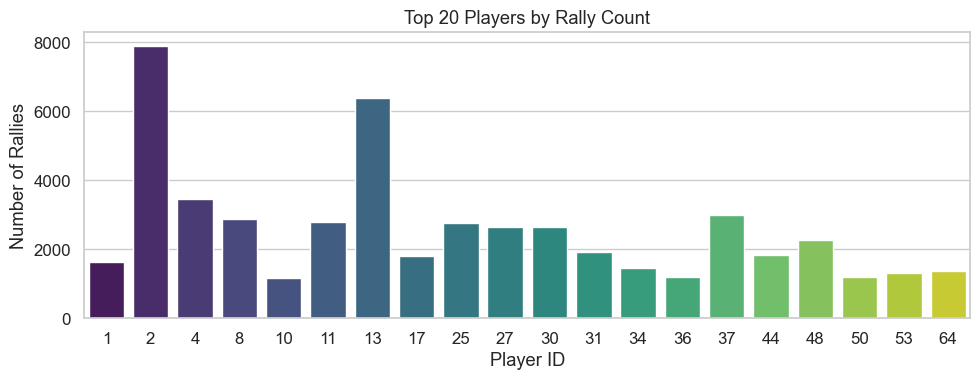


🏸 Total unique players: 144
count     144.000000
mean      680.500000
std      1019.095328
min         2.000000
25%       211.000000
50%       336.000000
75%       727.750000
max      7900.000000
Name: count, dtype: float64


In [ ]:
# =========================================================
# 2️⃣ Basic Player Statistics
# =========================================================
player_counts = df["player_id"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=player_counts.index[:20], y=player_counts.values[:20], palette="viridis")
plt.title("Top 20 Players by Rally Count")
plt.xlabel("Player ID")
plt.ylabel("Number of Rallies")
plt.tight_layout()
plt.show()

print("\n🏸 Total unique players:", df["player_id"].nunique())
print(player_counts.describe())

C:\Users\user\AppData\Local\Temp\ipykernel_26004\4089814246.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="player_id", y="server_get_point", data=player_win.head(20), palette="coolwarm")


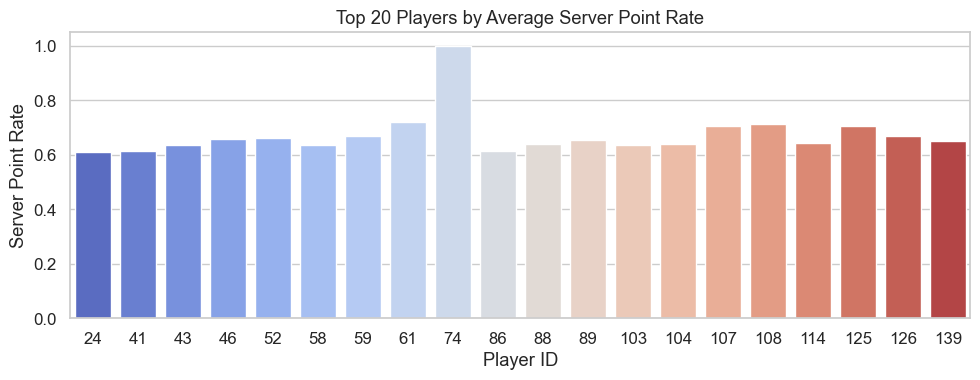


🏆 Player Win Rate Summary:
        player_id  server_get_point
count  144.000000        144.000000
mean    72.500000          0.525681
std     41.713307          0.091371
min      1.000000          0.000000
25%     36.750000          0.476824
50%     72.500000          0.522167
75%    108.250000          0.565654
max    144.000000          1.000000


In [3]:
# =========================================================
# 3️⃣ Player Win Rate (Server Point Rate)
# =========================================================
player_win = (
    df.groupby("player_id")["server_get_point"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
plt.figure(figsize=(10,4))
sns.barplot(x="player_id", y="server_get_point", data=player_win.head(20), palette="coolwarm")
plt.title("Top 20 Players by Average Server Point Rate")
plt.xlabel("Player ID")
plt.ylabel("Server Point Rate")
plt.tight_layout()
plt.show()

print("\n🏆 Player Win Rate Summary:")
print(player_win.describe())


C:\Users\user\AppData\Local\Temp\ipykernel_26004\1241947873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sex", y="server_get_point", palette="Set2")


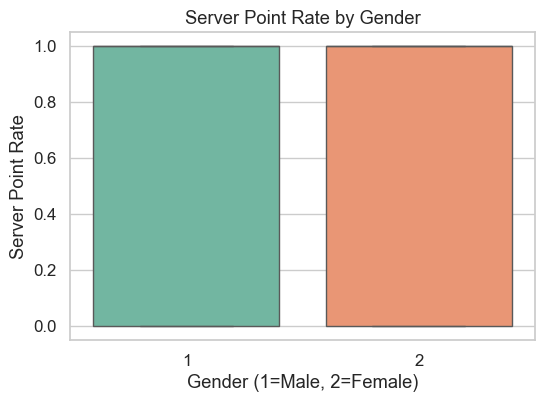

In [4]:
# =========================================================
# 4️⃣ Player Gender Comparison
# =========================================================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="sex", y="server_get_point", palette="Set2")
plt.title("Server Point Rate by Gender")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Server Point Rate")
plt.show()


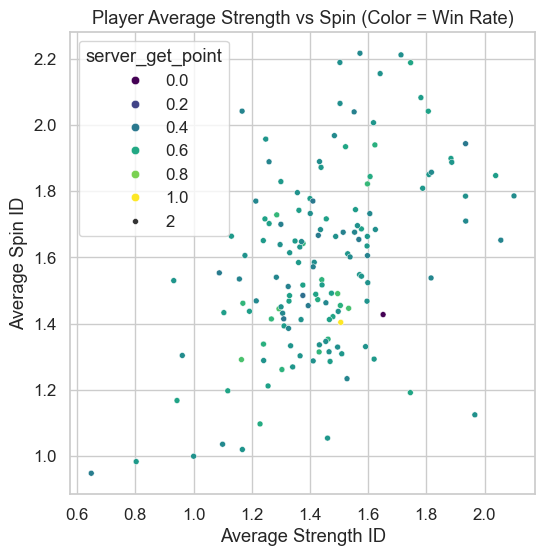

In [5]:
# =========================================================
# 5️⃣ Player Strength & Spin Distribution
# =========================================================
player_strength = df.groupby("player_id")["strength_id"].mean().reset_index()
player_spin = df.groupby("player_id")["spin_id"].mean().reset_index()

merged_stats = player_strength.merge(player_spin, on="player_id")
plt.figure(figsize=(6,6))
sns.scatterplot(data=merged_stats, x="strength_id", y="spin_id", hue=player_win["server_get_point"], palette="viridis", size=2)
plt.title("Player Average Strength vs Spin (Color = Win Rate)")
plt.xlabel("Average Strength ID")
plt.ylabel("Average Spin ID")
plt.show()

In [6]:
# =========================================================
# 6️⃣ Most Common Actions per Player
# =========================================================
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

player_action = df.groupby("player_id")["action_id"].apply(get_mode).reset_index(name="fav_action")
player_point = df.groupby("player_id")["point_id"].apply(get_mode).reset_index(name="fav_point")
player_style = player_action.merge(player_point, on="player_id")

print("\n🎯 Player Preferred Actions and Points:")
print(player_style.head(10))


🎯 Player Preferred Actions and Points:
   player_id  fav_action  fav_point
0          1           1          9
1          2           1          9
2          3           0         -1
3          4           1          8
4          5           1          9
5          6          10          9
6          7          -1          9
7          8          -1          9
8          9          -1          9
9         10           1          9


In [7]:
# =========================================================
# 7️⃣ Player Performance Summary Table
# =========================================================
summary = (
    df.groupby("player_id")
    .agg(
        total_rallies=("rally_uid", "count"),
        win_rate=("server_get_point", "mean"),
        avg_strength=("strength_id", "mean"),
        avg_spin=("spin_id", "mean"),
        avg_stroke=("stroke_number", "mean"),
        most_action=("action_id", get_mode),
        most_point=("point_id", get_mode)
    )
    .sort_values("win_rate", ascending=False)
)
print("\n📋 Player Performance Summary:")
print(summary.head(10))


📋 Player Performance Summary:
           total_rallies  win_rate  avg_strength  avg_spin  avg_stroke  \
player_id                                                                
74                     3  1.000000      1.333333  1.333333    3.000000   
61                   135  0.718519      1.570370  1.548148    3.325926   
108                  213  0.713615      1.370892  1.647887    4.629108   
107                  208  0.706731      1.432692  1.889423    4.634615   
125                   27  0.703704      1.259259  1.888889    3.074074   
59                   211  0.668246      1.597156  1.663507    4.772512   
126                   24  0.666667      1.166667  2.041667    3.083333   
52                   408  0.659314      1.129902  1.664216    4.232843   
46                   225  0.657778      1.400000  1.777778    4.191111   
89                   173  0.653179      1.300578  1.450867    3.369942   

           most_action  most_point  
player_id                           
74    

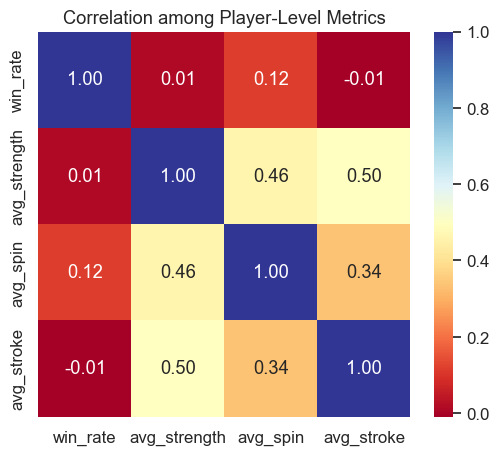


✅ Player-level EDA Completed Successfully.


In [8]:
# =========================================================
# 8️⃣ Correlation between player features
# =========================================================
corr = summary[["win_rate", "avg_strength", "avg_spin", "avg_stroke"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Correlation among Player-Level Metrics")
plt.show()

print("\n✅ Player-level EDA Completed Successfully.")
